In [6]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
%matplotlib inline

d:\measuring\data


#### Stage 0: ESR

In [7]:
execfile(r'D:/measuring/analysis/scripts/espin/simple_esr_fit.py')

ValueError: fname must be a string, file handle, or generator

#### Stage 1: SSRO

SSRO calibration :  20151231/074342
max. F = (96.65 +/- 0.36)% at t=10 us
	ms_0 = (94.22 +/- 0.33)%
	ms_1 = (99.08 +/- 0.14)%
Threshold = 96.5


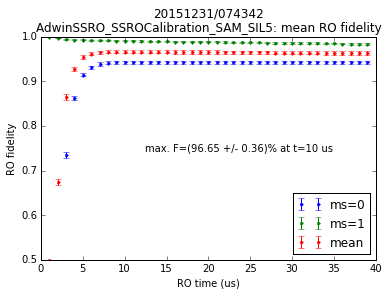

In [17]:
ssro.ssrocalib(plot_photon_ms0=False)
print 'Threshold = 96.5'


0.0395593390085


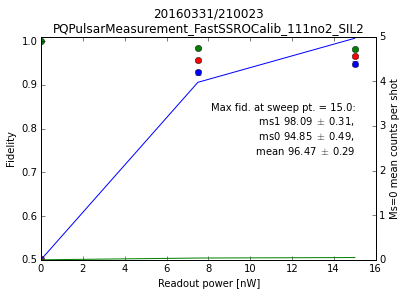

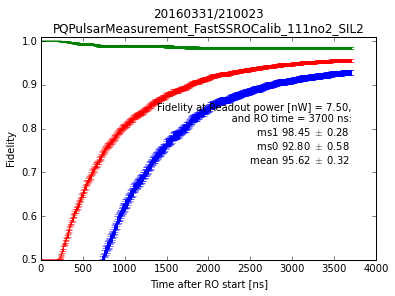

In [8]:
pqsequence.fast_ssro_calib(RO_length_ns=3700, plot_sweep_index=1)

#### Stage 3.1: Dark ESR

Converged with chi squared  0.0196709081497
degrees of freedom, dof  97
RMS of residuals (i.e. sqrt(chisq/dof))  0.0142405360686
Reduced chisq (i.e. variance of residuals)  0.000202792867522

fitted parameters at minimum, with 68% C.I.:
 0 a              1.013972 +/-   0.001902
 1 A              0.196938 +/-   0.004704
 2 sigma          0.003584 +/-   0.000107
 3 x0             1.731035 +/-   0.000067

correlation matrix:
               a         A         sigma     x0        
         a  1.000000
         A  0.285883  1.000000
     sigma  0.459064 -0.360274  1.000000
        x0 -0.000000  0.000006 -0.000005  1.000000



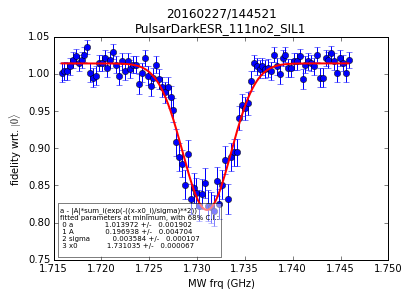

In [89]:
execfile(r'D:\measuring\analysis\scripts\espin\dark_esr_analysis_bell.py')

#### Stage 3.2: Pi pulse multiplicity 1

minimal point: 0.4


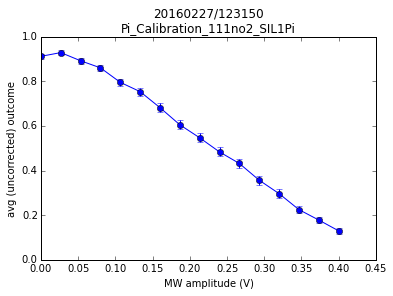

In [29]:
folder= tb.latest_data('Pi_Calibration')
a=sequence.SequenceAnalysis(folder)
a.get_sweep_pts()
a.get_readout_results(name='ssro')
ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro')
ax.set_ylim(0.0,1)
print 'minimal point:',a.sweep_pts[np.argmin(a.normalized_ssro)]

#### Stage 3.3: Pi pulse multiplicity 15

[ 0.567  0.502  0.492  0.458  0.35   0.313  0.215  0.173  0.145  0.147
  0.102  0.109  0.137  0.177  0.244  0.308]
min x =  0.19
min y = 0.090056694287
Pi pulse calib. 15 rep. from : 20160227145246 
Fidelity 86.468 +/- 1.578
	Fitted minimum at 0.190 V


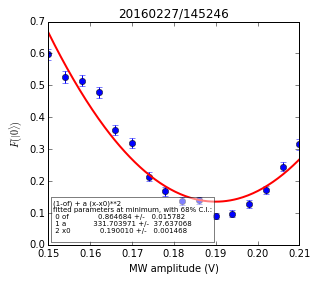

In [92]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('Pi_Calibration')
fit=calibration_tools.fit_parabolic(folder, x0_guess=0.9,a_guess=0.)

print 'Pi pulse calib. 15 rep. from : {} '.format(tb.timestamp_from_datetime(tb.get_datetime_from_folder(folder)))

print 'Fidelity {:.3f} +/- {:.3f}'.format(fit['params'][0]*100, fit['error'][0]*100)
print '\tFitted minimum at {:.3f} V'.format(fit['params'][2])
#print 'Fitted minimum at {:.4f}+/- {:.4f}'.format(fit['params'][2], fit['error'][2])
#print 'minimal point:',a.sweep_pts[np.argmin(a.normalized_ssro)]

#### Stage 3.4 Pi/2 calibration

[ 0.08   0.104  0.128  0.152  0.176  0.2    0.224  0.248  0.272  0.296
  0.32 ]
Converged with chi squared  0.00764586074077
degrees of freedom, dof  9
RMS of residuals (i.e. sqrt(chisq/dof))  0.0291468708836
Reduced chisq (i.e. variance of residuals)  0.000849540082308

fitted parameters at minimum, with 68% C.I.:
 0 m             -7.094013 +/-   0.115794
 1 x0             0.200859 +/-   0.001239

correlation matrix:
               m         x0        
         m  1.000000
        x0  0.011321  1.000000



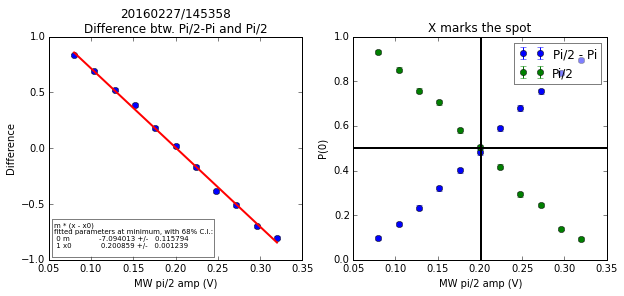

In [93]:
execfile(r'D:\measuring\analysis\scripts\espin\calibration_pi2_CORPSE.py')

###### Stage 3.42: Pi/2 pulse multiplicity 15

d:\measuring\data\20151228\164425_AdwinSSRO_SSROCalibration_SAM_SIL5
[ 0.8356  0.854   0.875   0.8904  0.9082  0.9118  0.9124  0.914   0.8874
  0.8792  0.8688]
min x =  0.746
min y = 0.888222698073
d:\measuring\data\20151228\164425_AdwinSSRO_SSROCalibration_SAM_SIL5
[ 0.8356  0.854   0.875   0.8904  0.9082  0.9118  0.9124  0.914   0.8874
  0.8792  0.8688]
min x =  0.746
min y = 0.888222698073
Pi/2 pulse calib. 15 rep. from : 20151228170211 
Fidelity 0.031 +/- 0.003
	Fitted minimum at 0.825 V


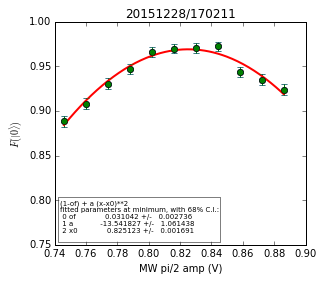

In [10]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('Pi2_Calibration')
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
ax.set_ylim(0.75,1)
fit=calibration_tools.fit_parabolic(folder, of_guess=0, x0_guess=0.84,a_guess=-1.,ax=ax)
fit_result=calibration_tools.plot_result(folder, ax=ax, ret=True)


print 'Pi/2 pulse calib. 15 rep. from : {} '.format(tb.timestamp_from_datetime(tb.get_datetime_from_folder(folder)))
print 'Fidelity {:.3f} +/- {:.3f}'.format(fit['params'][0], fit['error'][0])
print '\tFitted minimum at {:.3f} V'.format(fit['params'][2])

In [44]:
GoalValue=0.03
m=2.065
GoalValue*m/2.

0.030975

### Stage 3.5 Pi/4 calibration

d:\measuring\data\20151228\164425_AdwinSSRO_SSROCalibration_SAM_SIL5
[ 0.7564  0.7764  0.7964  0.8164  0.8364  0.8564  0.8764  0.8964  0.9164
  0.9364  0.9564]
Converged with chi squared  0.000425418896956
degrees of freedom, dof  9
RMS of residuals (i.e. sqrt(chisq/dof))  0.00687522845645
Reduced chisq (i.e. variance of residuals)  4.72687663284e-05

fitted parameters at minimum, with 68% C.I.:
 0 m              1.419408 +/-   0.032776
 1 x0             0.837090 +/-   0.001527

correlation matrix:
               m         x0        
         m  1.000000
        x0  0.292013  1.000000

3Pi/4 pulse calib.  from : 20151228\170528 


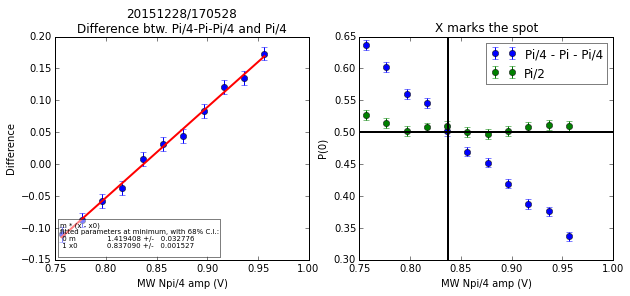

In [11]:
execfile(r'D:\measuring\analysis\scripts\espin\calibration_pi4.py')
print '3Pi/4 pulse calib.  from : {}\{} '.format(tb.timestamp_from_datetime(tb.get_datetime_from_folder(folder))[:8],tb.timestamp_from_datetime(tb.get_datetime_from_folder(folder))[8:])

In [13]:
GoalValue=0.776-0.75
m=1.419408/2.
GoalValue*m

0.018452304000000017

#### Stage 3.52 Pi/4 pole calibration

d:\measuring\data\20151228\164425_AdwinSSRO_SSROCalibration_SAM_SIL5
[ 0.9134  0.9234  0.9294  0.929   0.9362  0.9312  0.9208  0.9202  0.9108
  0.9076  0.9052]
min x =  0.9049
min y = 0.962740899358
3Pi/4 pulse pole calib.  from : 20151228\170809 
Fitted maximum at 0.8441
Fidelity 0.011 +/- 0.002


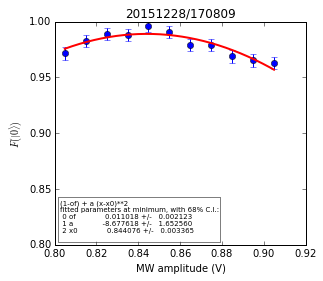

In [14]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('NPi4Calibration')
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
ax.set_ylim(0.8,1)
fit=calibration_tools.fit_parabolic(folder,of_guess=0., x0_guess=.87,a_guess=-1., ax=ax, info_xy='auto')
print '3Pi/4 pulse pole calib.  from : {}\{} '.format(tb.timestamp_from_datetime(tb.get_datetime_from_folder(folder))[:8]\
                                                 ,tb.timestamp_from_datetime(tb.get_datetime_from_folder(folder))[8:])
print 'Fitted maximum at {:.4f}'.format(fit['params'][2])
print 'Fidelity {:.3f} +/- {:.3f}'.format(fit['params'][0], fit['error'][0])

#### Stage 4.1: Bell echo

d:\measuring\data\20151204\090017_AdwinSSRO_SSROCalibration_SAM_SIL5


(0.0, 0.02)

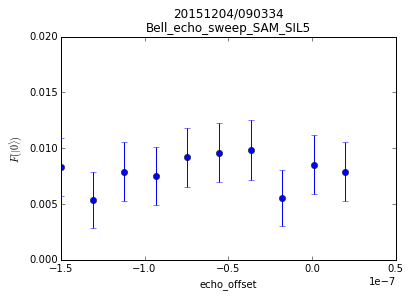

In [48]:
folder= tb.latest_data('echo')
a=sequence.SequenceAnalysis(folder)
a.get_sweep_pts()
a.get_readout_results(name='ssro')
a.get_electron_ROC()
ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro')
ax.set_ylim(0.,0.02)

#### Stage 4.2: Random MW RO correlation

In [ ]:
Run RND MW notebook

#### Stage 4.3: SP COrrelations

In [7]:
from scipy import optimize